##**Diabetes Prediction using Machine Learning** 

**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

## Objectives
*   classify whether someone has diabetes or not
*   fimiliarize with machine learning classification algorithms
*   identify the characteristics most predictive of diabetes

## Dataset
The dataset contains the following parameters:
1.   Pregnancies
2.   Glucose
3.   BloodPressure
4.   SkinThickness
5.   Insulin
6.   BMI
7.   DiabetesPedigreeFunction
8.   Age
9.   Outcome

All these variables can be divided into two categories: independetn and dependent variables. Our dataset consists of several independent and one dependent variable
The independent variables in this data set are :
*   Pregnancies - number of times a woman has been pregnant
*   Glucose - blood sugar level
*   BloodPressure - Diastollic Blood Pressure
*   SkinThickness - skin thickness 
*   Insulin - 2 hour serum insulin
*   BMI - Body Mass Index
*   DiabetesPedigreeFunction - function that determines the risk of type 2 diabetes based on family history
*   Age - physical age in years
And one dependent variable - Outcome - 0(doesn't have diabetes) or 1 (has diabetes).



## 1. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 2. Loading data

In [ ]:
df=pd.read_csv("/content/diabetes.csv")

## 3. Data Analysis

### 3.1 Exploration of the dataset
In this stage we perform exploratory data analysis be getting head, shape of the dataset, types of its columns and general information about the dataset.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.2 Data cleaning
For conducting further data analysis we need to get rid of missing data. In addation, medically speaking, some data records, like those for blood pressure or glucose levels, cannot have a number of 0. Therefore, we swap them out for the column's mean number.

In this section we will:
*   check missing data
*   replacing incorrect data

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
for parameter in df.loc[:, 'Glucose':'BMI']:
  print(parameter, (df[f'{parameter}'] == 0).sum())

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness.

When a distribution has zero skew, it is symmetrical. Its left and right sides are mirror images. For example, Normal distributions have zero skew.

The right edge of the peak of a right-skewed distribution is longer than the left. Positive skew is another name for right skew.

A left-skewed distribution is longer on the left side of its peak than on its right. In other words, a left-skewed distribution has a long tail on its left side. Left skew is also referred to as negative skew.

In [ ]:
for parameter in df.loc[:, 'Glucose':'BMI']:
  print(parameter, df[f'{parameter}'].skew(skipna = True))

Glucose 0.17375350179188992
BloodPressure -1.8436079833551302
SkinThickness 0.10937249648187608
Insulin 2.272250858431574
BMI -0.42898158845356543


BloodPressure: -1.8436079833551302 



<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

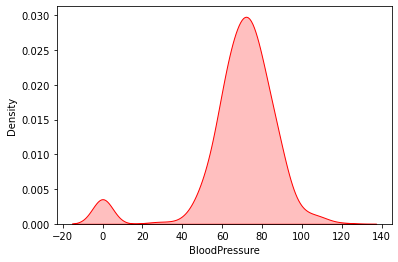

In [ ]:
print("BloodPressure:", df['BloodPressure'].skew(skipna = True), '\n')
sns.kdeplot(df["BloodPressure"], color="Red", shade = True)

Insulin: 2.272250858431574 



<AxesSubplot:xlabel='Insulin', ylabel='Density'>

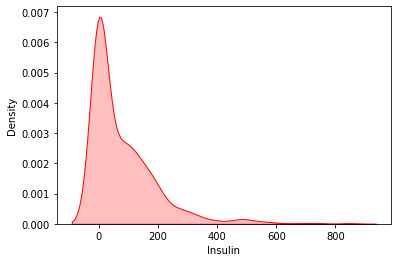

In [ ]:
print("Insulin:", df['Insulin'].skew(skipna = True), '\n')
sns.kdeplot(df["Insulin"], color="Red", shade = True)

The mean is more impacted by outliers than the median because some of the categories have a skewed distribution. Since blood pressure and glucose have normal distributions, the 0 numbers in those columns are changed to the mean value. Because the distributions of skin thickness, insulin, and BMI are skewed, the median is a preferable option because it is less influenced by outliers.

In [ ]:
replacing = {'Glucose': 'mean', 'BloodPressure': 'mean', 'SkinThickness': 'median', 
             'Insulin': 'median', 'BMI': 'median'}

def replace_values(pd: pd.DataFrame, method: str) -> pd.DataFrame:
  return pd.replace(0, pd.mean()) if method == 'mean' else pd.replace(0, pd.median())

for key, value in replacing.items():
  df[f'{key}'] = replace_values(df[f'{key}'], value)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


### 4. Data Visualization
Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

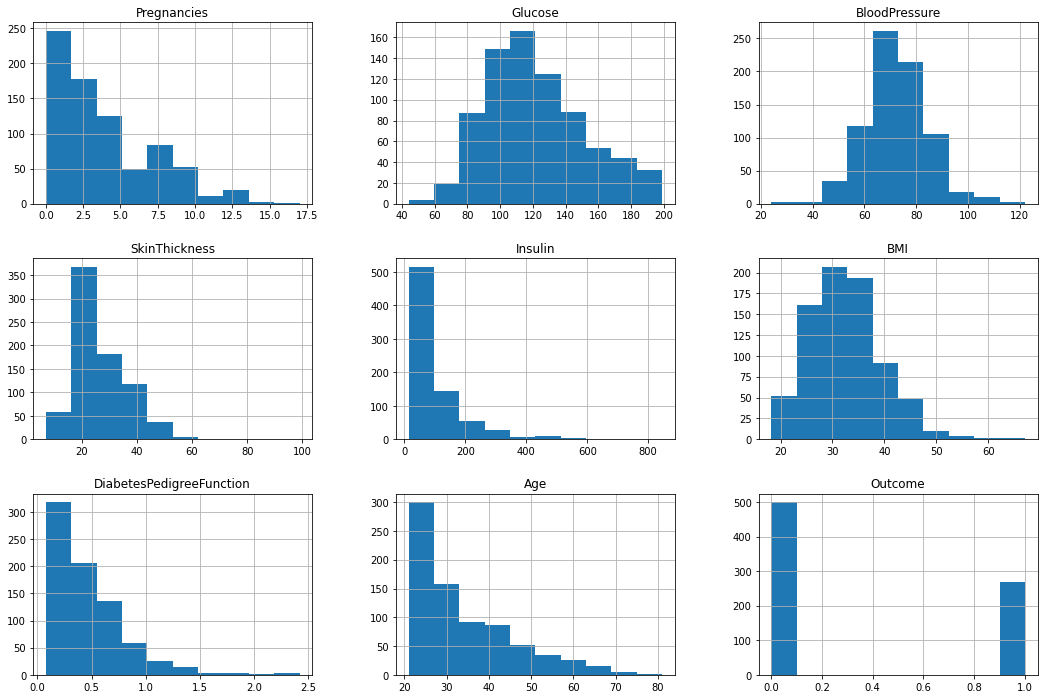

In [ ]:
df.hist(figsize=(18,12))
plt.show()

<AxesSubplot:>

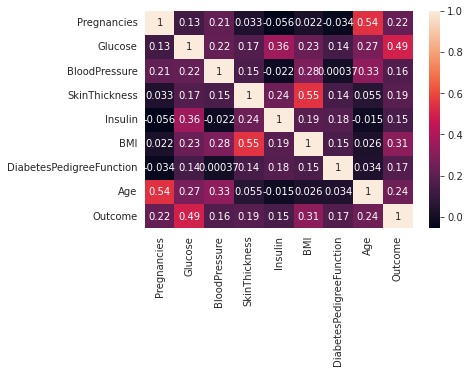

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

Considering the haetmap, features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome.

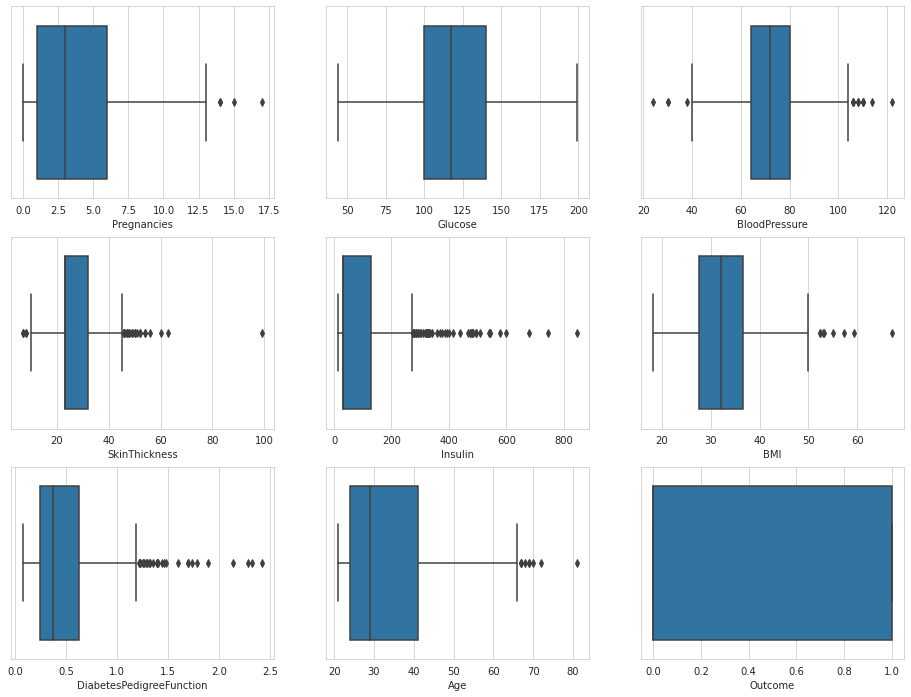

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

for i, column in enumerate(df.columns):
  plt.subplot(3,3,i + 1)
  sns.boxplot(x=f'{column}',data=df)


<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

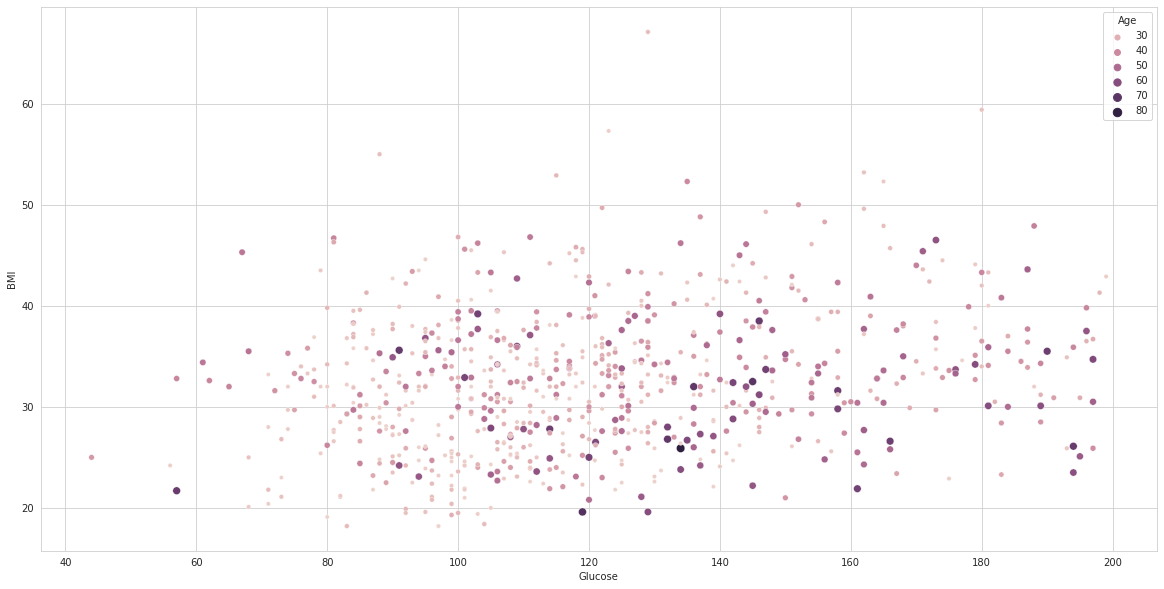

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

We visualized our data with the help of box plot that analyse the distribution and see the outliers, and scatter plot, which help to understand relationship between variables.

As we can see our data definitely has outliers. Aan outlier is a data point that differs significantly from other observations.

### 5. Outlier Detecton
Outlier detection is a key consideration within the development and deployment of machine learning algorithms. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.

We will use IQR method. Inter Quartile Range (IQR) approach to finding the outliers is the most commonly used and most trusted approach used in the research field.


In [ ]:
import sklearn
from collections import Counter

outlier_indices = []

# IQR
for column in df.columns:

  Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
  
  Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
  
  IQR = Q3 - Q1

  outlier_step = 1.5 * IQR
  outlier_list = df[(df[column] < Q1 - outlier_step) | 
                    (df[column] > Q3 + outlier_step )].index

  outlier_indices.extend(outlier_list)

outlier_indices = Counter(outlier_indices)
outliers = list( k for k, v in outlier_indices.items() if v > 2)

df.loc[outliers]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46,130.0,67.1,0.319,26,1
370,3,173.0,82.0,48,465.0,38.4,2.137,25,1
445,0,180.0,78.0,63,14.0,59.4,2.420,25,1


In [ ]:
df.drop(df.loc[outliers].index, inplace=True)

In [ ]:
from sklearn.preprocessing import QuantileTransformer

x = df
quantile = QuantileTransformer()
X = quantile.fit_transform(x)
df_quantile = quantile.transform(X)
df_quantile = pd.DataFrame(X)
df_quantile.columns = df.columns

df_quantile.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.746728,0.812173,0.518979,0.804974,0.255890,0.593586,0.752618,0.889398,1.0
1,0.230366,0.091623,0.290576,0.645942,0.255890,0.214005,0.476440,0.556937,0.0
2,0.863220,0.956806,0.234293,0.358639,0.255890,0.077880,0.784031,0.582461,1.0
3,0.230366,0.125654,0.290576,0.358639,0.662958,0.285340,0.106675,0.000000,0.0
4,0.000000,0.723168,0.005236,0.804974,0.834424,0.929319,0.998691,0.604712,1.0


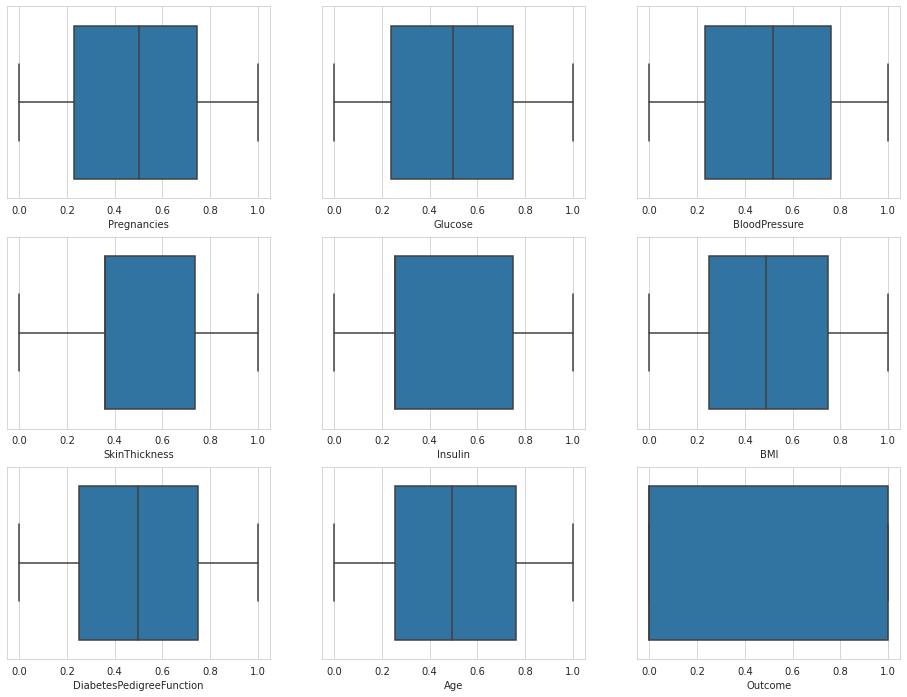

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

for i, column in enumerate(df_quantile.columns):
  plt.subplot(3,3,i + 1)
  sns.boxplot(x=f'{column}',data=df_quantile)

We have successfully removed all outliers from our dataset. 

### 6. Split the data into test and train


In [ ]:
from sklearn.model_selection import train_test_split

Y = df_quantile["Outcome"]
X = df_quantile.drop(["Outcome"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [ ]:
x_train.shape, y_train.shape

((535, 8), (535,))

In [ ]:
x_test.shape, y_test.shape

((230, 8), (535,))

### 7. Classification Algorithms
We will perform the following classification algorithms:
*   Logistic Regression
*   KNN
*   Naive Bayes
*   SVM
*   Decision Tree
*   Random Forest

#### Performance Metrics 
**Confusion Matrix**
It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.

Confusion matrix contains the following cells:

**True Positive (TP)** — model correctly predicts the positive class (prediction and actual both are positive).

**True Negative (TN)** — model correctly predicts the negative class (prediction and actual both are negative). 

**False Positive (FP)** — model gives the wrong prediction of the negative class (predicted-positive, actual-negative).

**False Negative (FN)** — model wrongly predicts the positive class (predicted-negative, actual-positive). 



**Precision Score**

Determine out of all the positive predicted, what percentage is truly positive.


**Recall Score**

Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).


**F1 Score**

It is the harmonic mean of precision and recall. It takes both false positive and false negatives into account.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def analyze(y_test, y_pred):
  print("Accuracy", accuracy_score(y_test,y_pred)*100, "\n")
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("\n Confusion Matrix:\n")
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#### 7.1 Logistic regression
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no.

In [ ]:
reg = LogisticRegression()
reg.fit(x_train,y_train)  

LogisticRegression()

Accuracy 74.78260869565217 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       160
         1.0       0.59      0.54      0.57        70

    accuracy                           0.75       230
   macro avg       0.70      0.69      0.69       230
weighted avg       0.74      0.75      0.74       230


 Confusion Matrix:



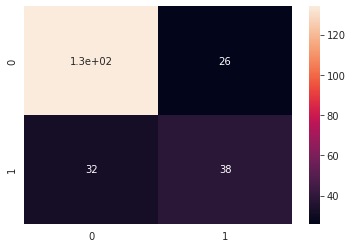

In [ ]:
logistic_pred = reg.predict(x_test)

analyze(y_test, logistic_pred)

#### 7.2 K-nearst neighbours (KNN)
KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy 76.52173913043478 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       160
         1.0       0.62      0.59      0.60        70

    accuracy                           0.77       230
   macro avg       0.72      0.71      0.72       230
weighted avg       0.76      0.77      0.76       230


 Confusion Matrix:



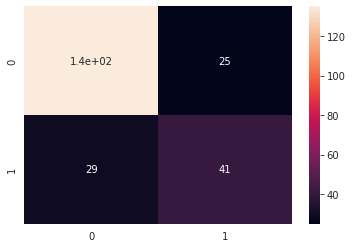

In [ ]:
knn_pred = knn.predict(x_test)

analyze(y_test, knn_pred)

#### 7.3 Support Vector Machine (SVM)
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

Accuracy 73.91304347826086 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       160
         1.0       0.58      0.54      0.56        70

    accuracy                           0.74       230
   macro avg       0.69      0.68      0.69       230
weighted avg       0.74      0.74      0.74       230


 Confusion Matrix:



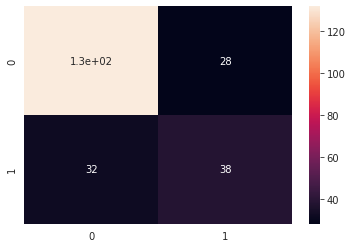

In [ ]:
svc_pred = svc.predict(x_test)

analyze(y_test, svc_pred)

#### 7.4 Naive Bayes 
It is a classification technique based on Bayes' Theorem with an independence assumption among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Accuracy 75.21739130434783 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       160
         1.0       0.59      0.63      0.61        70

    accuracy                           0.75       230
   macro avg       0.71      0.72      0.71       230
weighted avg       0.76      0.75      0.75       230


 Confusion Matrix:



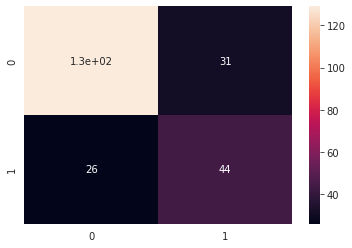

In [ ]:
gnb_pred = gnb.predict(x_test)

analyze(y_test, gnb_pred)

#### 7.5 Decision Tree
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

Accuracy 73.91304347826086 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       160
         1.0       0.56      0.63      0.59        70

    accuracy                           0.74       230
   macro avg       0.70      0.71      0.70       230
weighted avg       0.75      0.74      0.74       230


 Confusion Matrix:



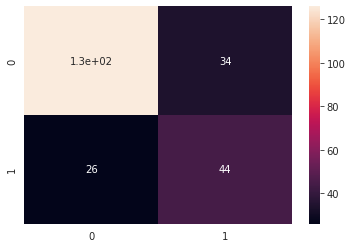

In [ ]:
dtree_pred = dtree.predict(x_test)

analyze(y_test, dtree_pred)

#### 7.6 Random Forest
The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

Accuracy 75.65217391304347 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       160
         1.0       0.60      0.60      0.60        70

    accuracy                           0.76       230
   macro avg       0.71      0.71      0.71       230
weighted avg       0.76      0.76      0.76       230


 Confusion Matrix:



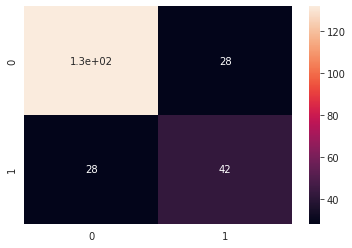

In [ ]:
rfc_pred = rfc.predict(x_test)

analyze(y_test, rfc_pred)

## 8. Hyper Parameter Tuning using GridSearch CV

Hyperparameters are the variables that you can specify when training a machine learning model. These variables are different from the parameters that you might typically set, and they're used to help optimize the model. Hyperparameters are user-defined, so you can choose whatever values work best for you.

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.


In [ ]:
def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    print()

#### 8.1 Logistic Regresiion

Tuned hyperparameters: (best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7612727272727272
Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       160
         1.0       0.59      0.56      0.57        70

    accuracy                           0.75       230
   macro avg       0.70      0.69      0.70       230
weighted avg       0.74      0.75      0.75       230




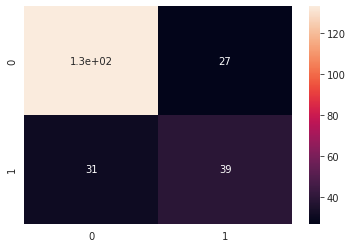

In [ ]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

#### 8.2 K-nearest neighbour (KNN)

Tuned hyperparameters: (best parameters)  {'metric': 'manhattan', 'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.6241005155477896
Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       160
         1.0       0.61      0.54      0.58        70

    accuracy                           0.76       230
   macro avg       0.71      0.70      0.70       230
weighted avg       0.75      0.76      0.75       230




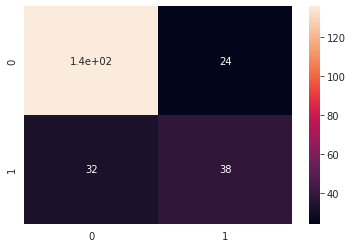

In [ ]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()

#convert to dictionary
tuned_parameters = dict(n_neighbors=list(range(15,25)), p=[1,2], 
                        weights=['uniform', 'distance'],
                        metric=['euclidean', 'manhattan', 'minkowski'])

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=tuned_parameters, 
                           n_jobs=-1, cv=cv, scoring='f1',error_score=0)

scv_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

#### 8.3 Support Vector Machine (SVM)

Tuned hyperparameters: (best parameters)  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy : 0.7644292582033652
Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       160
         1.0       0.60      0.56      0.58        70

    accuracy                           0.75       230
   macro avg       0.71      0.70      0.70       230
weighted avg       0.75      0.75      0.75       230




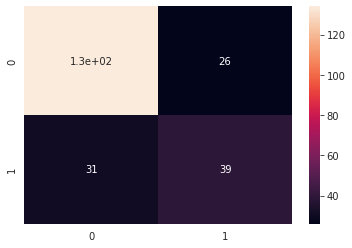

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define models and parameters for LogisticRegression
model = SVC()

# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

#### 8.4 Decision Tree

Fitting 2 folds for each of 40 candidates, totalling 80 fits
Tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
Accuracy : 0.7345505617977528
Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       160
         1.0       0.60      0.63      0.62        70

    accuracy                           0.76       230
   macro avg       0.72      0.72      0.72       230
weighted avg       0.76      0.76      0.76       230




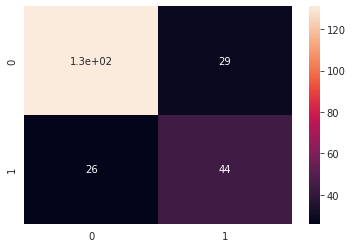

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_result = grid_search.fit(x_train, y_train)

analyze_grid_result(grid_result)

#### 8.5 Random Forest

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
Accuracy : 0.7887249147520823
Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       160
         1.0       0.59      0.54      0.57        70

    accuracy                           0.75       230
   macro avg       0.70      0.69      0.69       230
weighted avg       0.74      0.75      0.74       230




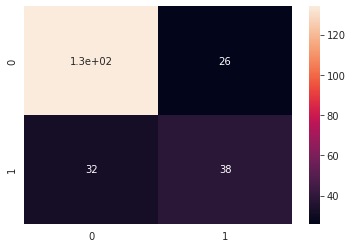

In [ ]:
# Define models and parameters for LogisticRegression
model = RandomForestClassifier(random_state=42)


# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(grid_result)